# **REGRESSION ANALYSIS ON VEHICLES DATASET**

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# DATA PREPROCESSING

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.shape

(4340, 8)

In [6]:
#removing duplicate entries
data.drop_duplicates(keep='first',inplace=True)
data.shape

(3577, 8)

In [7]:
#check missing or null values
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Hence there are no null values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [9]:
data.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577,3577.000000,3.577000e+03,3577.000000,3577,3577,3577,3577
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,54,NaN,NaN,NaN,1800,2832,3265,2218
mean,NaN,2012.962538,4.739125e+05,69250.545709,NaN,NaN,NaN,NaN
std,NaN,4.251759,5.093018e+05,47579.940016,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,2.000000e+05,36000.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


Hence we have 5 categorical columns. If we do not drop "Car_Name" before converting the categorical data to indicators, the resultant data will give 98+ features making the data redundant. Hence:

In [10]:
del data["name"]

In [11]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
data=data[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price']]

In [13]:
#checking unique values for the categorical data
print(data["fuel"].unique())
print(data["seller_type"].unique())
print(data["transmission"].unique())
print(data["owner"].unique())


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [14]:
datac=data.copy(deep=True)

In [15]:
#Converting the categorical to indicator variables.
data=pd.get_dummies(data,drop_first =True)
data.head()

,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,60000,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,135000,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,600000,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,250000,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,450000,1,0,0,0,1,0,1,0,1,0,0


The column "Year" is meaningless unless it is in terms of the number of years after which the selling price is being estimated. Hence:

In [16]:
from datetime import date
year=date.today().year
year
data.year = year-data.year

In [17]:
data.columns

Index(['year', 'km_driven', 'selling_price', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [18]:
data.head()

,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,14,70000,60000,0,0,0,1,1,0,1,0,0,0,0
1,14,50000,135000,0,0,0,1,1,0,1,0,0,0,0
2,9,100000,600000,1,0,0,0,1,0,1,0,0,0,0
3,4,46000,250000,0,0,0,1,1,0,1,0,0,0,0
4,7,141000,450000,1,0,0,0,1,0,1,0,1,0,0


# Training and Testing Data.
We now go ahead and split the data into training and testing sets. We define a variable X that will contain all the columns except the target column and store the target column, i.e, "Selling_Price" in another variable, say y.
 

In [19]:
y = data.iloc[:,1]
X = data.iloc[:,:-1]

In [20]:
X

,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car
0,14,70000,60000,0,0,0,1,1,0,1,0,0,0
1,14,50000,135000,0,0,0,1,1,0,1,0,0,0
2,9,100000,600000,1,0,0,0,1,0,1,0,0,0
3,4,46000,250000,0,0,0,1,1,0,1,0,0,0
4,7,141000,450000,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,7,80000,409999,1,0,0,0,1,0,1,0,1,0
4336,7,80000,409999,1,0,0,0,1,0,1,0,1,0
4337,12,83000,110000,0,0,0,1,1,0,1,0,1,0
4338,5,90000,865000,1,0,0,0,1,0,1,0,0,0


In [21]:
y

0        70000
1        50000
2       100000
3        46000
4       141000
         ...  
4335     80000
4336     80000
4337     83000
4338     90000
4339     40000
Name: km_driven, Length: 3577, dtype: int64

In [22]:
#Train-test split of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [23]:
print(X_train,"\n\n\n\n",X_test,"\n\n\n\n",y_train,"\n\n\n\n",y_test)

      year  km_driven  ...  owner_Second Owner  owner_Test Drive Car
3845     7     145000  ...                   0                     0
1604     6      60000  ...                   0                     0
3386     8      70000  ...                   1                     0
3368    14      85000  ...                   1                     0
4166     6      77000  ...                   0                     0
...    ...        ...  ...                 ...                   ...
1272     8      40771  ...                   0                     0
1437     9     120000  ...                   0                     0
977      3      50000  ...                   0                     0
4221     4      35000  ...                   0                     0
3773     9      67000  ...                   1                     0

[2396 rows x 13 columns] 



       year  km_driven  ...  owner_Second Owner  owner_Test Drive Car
1045     3      20000  ...                   0                     0
319

# Training the regression models.


In [24]:
#Importing libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [25]:
#linear regression
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-8.68310454e-12  1.00000000e+00  1.11022302e-16  3.54735796e-13
  8.47032947e-22  1.13051658e-13  1.13148448e-13 -4.32862076e-13
  3.65094960e-13 -2.71765605e-13 -1.54067398e-14  7.05264319e-13
 -1.40609124e-12]


In [26]:
ridgeregr = linear_model.Ridge(alpha=30, normalize =True)

# Train the model using the training sets
ridgeregr.fit(X_train, y_train)

# Make predictions using the testing set
ridge_y_pred = ridgeregr.predict(X_test)
print('Coefficients: \n', ridgeregr.coef_)

Coefficients: 
 [ 1.43662398e+02  3.18013275e-02 -5.08802348e-04  8.68342021e+02
  0.00000000e+00  6.46873912e+02 -8.82274220e+02  4.36298144e+02
 -6.84589385e+02  5.83897485e+02  9.22791587e+02  6.61509360e+02
 -1.97287918e+03]


In [27]:
lasso =linear_model.Lasso(alpha=50 , normalize = False) 
lasso.fit(X_train,y_train)

# Make predictions using the testing set
lasso_y_pred = lasso.predict(X_test)
print('Coefficients: \n', lasso.coef_)

Coefficients: 
 [-0.00000000e+00  1.00000043e+00  7.03360613e-09 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


# Performance Evaluation. 

Mean squared error: 0.0000


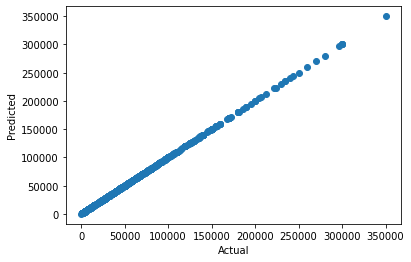

In [28]:
plt.pyplot.scatter(y_test, y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


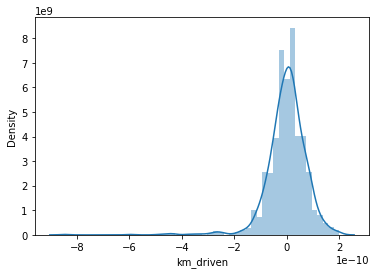

In [29]:
sns.distplot(y_test-y_pred)

The distribution of error follows normal distribution indeed. Though for plain regression model, the distribution is slightly left(negatively) skewed,i.e, it has more negative values compared to the number of positive values.

Mean squared error: 1988241733.8716


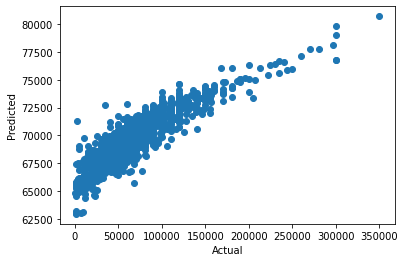

In [30]:
plt.pyplot.scatter(y_test, ridge_y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('Mean squared error: %.4f' % mean_squared_error(y_test, ridge_y_pred))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


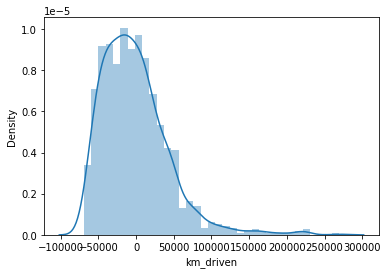

In [31]:
sns.distplot(y_test-ridge_y_pred)

    The distribution for error in case of normalized Ridge regression model is right(positively) skewed for the data used here.

Mean squared error: 0.0004


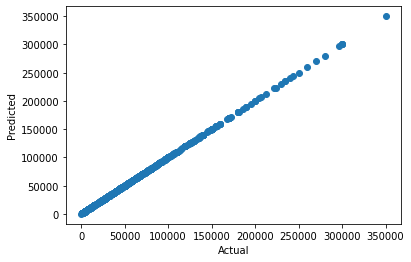

In [32]:
plt.pyplot.scatter(y_test, lasso_y_pred)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Actual')
print('Mean squared error: %.4f' % mean_squared_error(y_test, lasso_y_pred))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


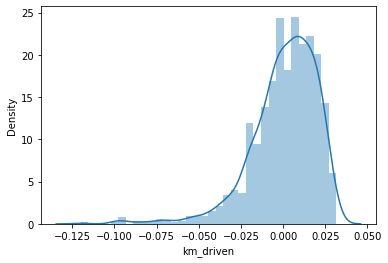

In [33]:
sns.distplot(y_test-lasso_y_pred)

Unlike Ridge, the distribution for error in case of Lasso regression model is left(negatively) skewed for the data used here.

CONCLUSION:
Lasso tends to perform better when compared to ridge.